## Top Indian Cities

#### Problem Statement:
Find out which cities are generally chosen for starting a startup.<br>
<br>
Find top 10 Indian cities which have most number of startups?<br>
<br>
Plot a pie chart and visualise it.<br>
<br>
Print the city name and number of startups in that city also.<br>

__Note:__<br>
Take city name "Delhi" as "New Delhi"<br>
<br>
Check the case-sensitiveness of cities also. That means at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".<br>
<br>
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in India startup also. Indian city name is first.<br>
<br>
Print the city in descending order with respect to the number of stratups.<br>
<br>
#### Output Format:
city1 number1<br>
city2 number2<br>
...<br>
...<br>
...<br>

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset
startup = pd.read_csv('startup_funding.csv')
# making the copy of the dataframe
df = startup.copy()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [5]:
#Extracting the columns startup name and CityLocation
mycolumns = ['StartupName', 'CityLocation']
df2 = df.loc[:, mycolumns]
df2

,StartupName,CityLocation
0,TouchKin,Bangalore
1,Ethinos,Mumbai
2,Leverage Edu,New Delhi
3,Zepo,Mumbai
4,Click2Clinic,Hyderabad
...,...,...
2367,Printvenue,NaN
2368,Graphene,NaN
2369,Mad Street Den,NaN
2370,Simplotel,NaN


In [6]:
# removing NaN values from Citylocation
df2.dropna(subset=['CityLocation'], inplace=True)
df2

,StartupName,CityLocation
0,TouchKin,Bangalore
1,Ethinos,Mumbai
2,Leverage Edu,New Delhi
3,Zepo,Mumbai
4,Click2Clinic,Hyderabad
...,...,...
2196,Tracxn,Bangalore
2197,Dazo,Bangalore
2198,Tradelab,Bangalore
2199,PiQube,Chennai


In [7]:
#function to split indian cities from string
def ind_city(city):
    return city.split('/')[0].strip()

In [8]:
#replacing the wrong written city
df2['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
df2['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
df2['CityLocation'].replace("SFO / Bangalore", "Bangalore", inplace = True)
df2['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)
df2['CityLocation'].replace("Goa/Hyderabad", "Hyderabad", inplace = True)
df2['CityLocation'].replace("Dallas/Hyderabad", "Hyderabad", inplace = True)

In [9]:
df2['CityLocation'].isin(['SFO/Bangalore']).any()

False

In [10]:
#filtering indian city
df2['CityLocation'] = df2['CityLocation'].apply(ind_city)
df2

,StartupName,CityLocation
0,TouchKin,Bangalore
1,Ethinos,Mumbai
2,Leverage Edu,New Delhi
3,Zepo,Mumbai
4,Click2Clinic,Hyderabad
...,...,...
2196,Tracxn,Bangalore
2197,Dazo,Bangalore
2198,Tradelab,Bangalore
2199,PiQube,Chennai


In [11]:
#filtering the cities on the basis of given conditions
df2 = df2[(df2['CityLocation'] == "Bangalore") | (df2['CityLocation'] == "Mumbai") | (df2['CityLocation'] == "Gurgaon") | 
          (df2['CityLocation'] == "Noida") | (df2['CityLocation'] == "New Delhi") | (df2['CityLocation'] == "Pune") | 
         (df2['CityLocation'] == "Chennai") | (df2['CityLocation'] == "Ahmedabad") | (df2['CityLocation'] == "Jaipur") | 
          (df2['CityLocation'] == "Hyderabad")]

In [12]:
df2

,StartupName,CityLocation
0,TouchKin,Bangalore
1,Ethinos,Mumbai
2,Leverage Edu,New Delhi
3,Zepo,Mumbai
4,Click2Clinic,Hyderabad
...,...,...
2196,Tracxn,Bangalore
2197,Dazo,Bangalore
2198,Tradelab,Bangalore
2199,PiQube,Chennai


In [13]:
# dropping the 'StartupName' labels
df3 = df2.drop(labels=['StartupName'], axis=1)
df3

,CityLocation
0,Bangalore
1,Mumbai
2,New Delhi
3,Mumbai
4,Hyderabad
...,...
2196,Bangalore
2197,Bangalore
2198,Bangalore
2199,Chennai


In [14]:
# frequency of each city
df4 = pd.DataFrame(df3.CityLocation.value_counts())
df4

,CityLocation
Bangalore,637
Mumbai,449
New Delhi,389
Gurgaon,241
Pune,91
Noida,79
Hyderabad,78
Chennai,67
Ahmedabad,35
Jaipur,25


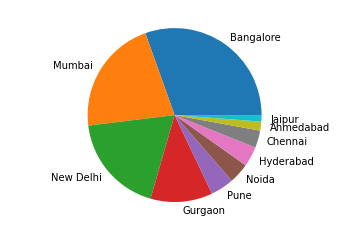

In [15]:
# plotting pie chart
counts = df4.CityLocation
labels = df4.index
plt.axis("equal")
plt.pie(counts, labels=labels)
plt.show()